# Data Visualization

by Chris North, Virginia Tech

Visualization theory, uni-variate and bi-variate  charts, color, multi-dimensional data visualization

Data files: States2010.csv

### How does data visualization help in data science?

What types of tasks can it help with?
* Anscombe's quartet https://en.wikipedia.org/wiki/Anscombe%27s_quartet 

Some good examples:
* Historical: https://en.wikipedia.org/wiki/Charles_Joseph_Minard
* Infographic: http://graphics.wsj.com/job-market-tracker/
* Interactive: https://www.gapminder.org/world/
* Tree data: https://finviz.com/map.ashx
* Network data: https://flowingdata.com/2012/01/02/high-resolution-maps-of-science/
* Text data: https://books.google.com/ngrams

Some bad examples: 
* Chart junk: https://cdn-images-1.medium.com/max/2600/1*iQcNh732KTyKd6qROcebhg.png
* Lies: https://flowingdata.com/2017/02/09/how-to-spot-visualization-lies/ 
* Distortion: https://xkcd.com/2023/


## Theory: Mapping data values to graphics 

Goal:  visually organize large amount of data so as to make patterns in apparent.

1. Row &rarr; Shape
    * `Shapes = Rows.map(func)`  where  `shape = func(row)`
![](https://www.cs.ubc.ca/~tmm/vadbook/eamonn-figs/fig5.2.pdf)

2. Column &rarr; Shape_attribute  
    * `Shape_attribute = Column.map(func)` where `attribute = func(value)`
![](https://www.cs.ubc.ca/~tmm/vadbook/eamonn-figs/fig5.3.pdf)


### Cleveland's experiments about human visual perception

What percentage is the smaller one of the larger one?

Length: 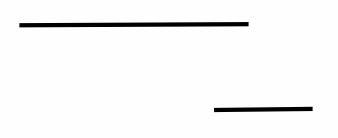
Angle: 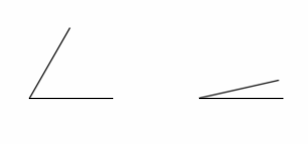
Luminance: 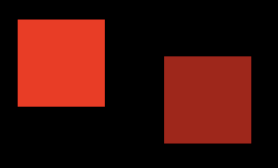
Horiz position: 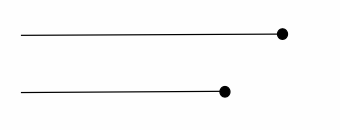
Area: 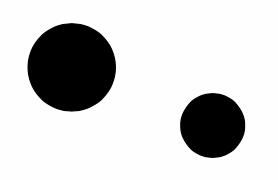


In [1]:
### 
import pandas
c = pandas.DataFrame(
    {'Length': [],
     'Angle': [],
     'Lumin': [],
     'Xpos': [],
     'Area': []})
c

,Length,Angle,Lumin,Xpos,Area


### Munzner's ranking of visual encodings 
* quantitative ('Magnitude') vs categorical data
* bar vs pie?
* color?

http://www.cs.ubc.ca/~tmm/vadbook/eamonn-figs/fig5.1.pdf


### Visualization in Python/Jupyter

* Pandas plot API: http://pandas.pydata.org/pandas-docs/stable/visualization.html
* Matplotlib API: http://matplotlib.org/api/pyplot_summary.html
* Matplotlib gallery: http://matplotlib.org/gallery.html 
* Pandas for Everyone, Chapter 3
* Python for Data Analysis, Chapter 8


In [158]:
### Libraries:
import pandas
import numpy
import matplotlib
import matplotlib.pyplot as plt

### Choose one of these graphical output styles:

# Static (most reliable)
%matplotlib inline 

# Interactive (if its broken, might need to Restart Kernel)
#%matplotlib notebook


In [159]:
###
s = pandas.read_csv("data/States2010.csv")
s.head()

,Name,Abbrev,Population,Pop2000,IncomePerCapita,PercentCollegeGrad,MedianRent,CommuteTime,LandArea
0,Alabama,AL,4779736,4447100,32419,21.5,435,23.7,50645.33
1,Alaska,AK,710231,626932,40042,26.5,857,17.9,570640.95
2,Arizona,AZ,6392017,5130632,32833,25.7,709,24.9,113594.08
3,Arkansas,AR,2915918,2673400,30177,18.9,425,21.0,52035.48
4,California,CA,37253956,33871648,41805,29.7,1002,27.0,155779.22


## Common uni-/bi-variate charts

* Catalogue of simple chart types: https://datavizcatalogue.com
* (data type, question type) &rarr; chart type
* Pandas, matplotlib:  `dataFrame.plot.xxx`


### Histogram

* Data type: 
    * **quantitative** data column &rarr; x-axis (bins) 
    * bin frequency &rarr; y-axis (bin height)
* Question type:  distributions
* Description: https://datavizcatalogue.com/methods/histogram.html
* Variations: box&wisker, kernel density, violin
* Python: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.hist.html , 
https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html

What is the distribution of the PercentCollegeGrad variable?

<AxesSubplot:ylabel='Frequency'>

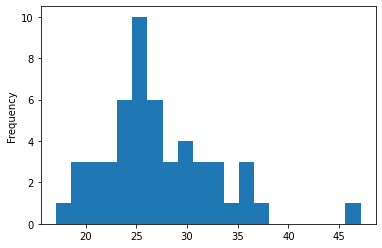

In [4]:
s.PercentCollegeGrad.plot.hist(bins=20)

<AxesSubplot:>

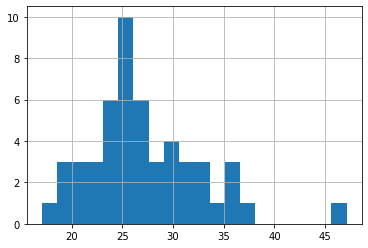

In [5]:
s.PercentCollegeGrad.hist(bins=20)

In [6]:
s[s.PercentCollegeGrad>40]

,Name,Abbrev,Population,Pop2000,IncomePerCapita,PercentCollegeGrad,MedianRent,CommuteTime,LandArea
8,District of Columbia,DC,601723,572059,62484,47.1,882,29.4,61.05


In [7]:
s.iloc[s.PercentCollegeGrad.idxmax()]

Name                  District of Columbia
Abbrev                                  DC
Population                          601723
Pop2000                             572059
IncomePerCapita                      62484
PercentCollegeGrad                    47.1
MedianRent                             882
CommuteTime                           29.4
LandArea                             61.05
Name: 8, dtype: object

### Bar Chart

* Data types: 
    * **categorical unique key** column &rarr; x-axis (bar)
    * **quantitative** column &rarr; y-axis (bar height)
* Question type:  value comparisons
* Description: https://datavizcatalogue.com/methods/bar_chart.html
* Variations: 
    * multi-set bar, stacked bar, 100% stacked bar
        * additional categorical column or sub-categories
    * Pie chart:  ratio to sum  https://datavizcatalogue.com/methods/pie_chart.html
        * key &rarr; slice; quantitative &rarr; slice angle
* Python: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.bar.html

How do the states compare in terms of PercentCollegeGrad?

<AxesSubplot:xlabel='Name'>

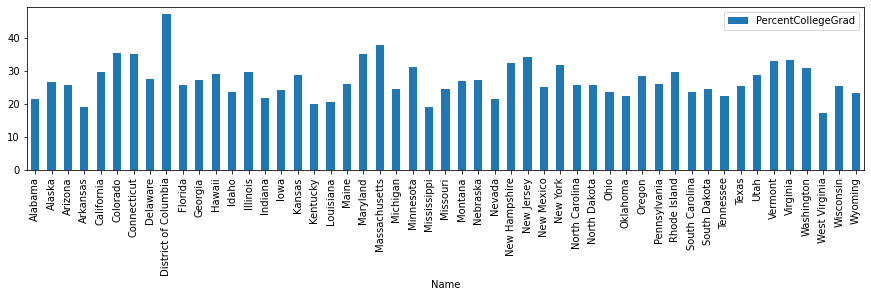

In [8]:
s.plot.bar(x='Name', y='PercentCollegeGrad', figsize=(15,3))

<AxesSubplot:xlabel='Name'>

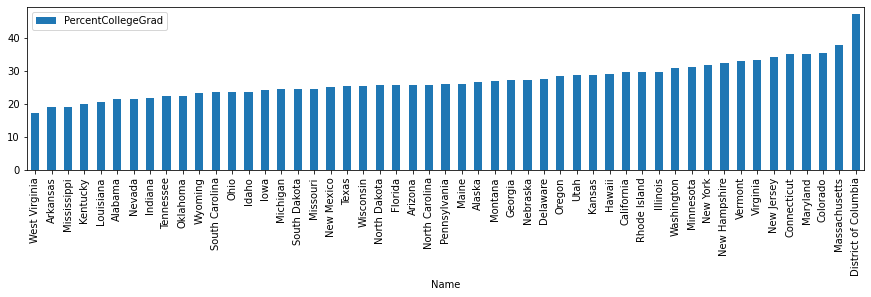

In [9]:
s.sort_values('PercentCollegeGrad').plot.bar(x='Name', y='PercentCollegeGrad', figsize=(15,3))

### Scatter plot

* Data types: 
    * **quantitative** column &rarr; x-axis
    * **quantitative** column &rarr; y-axis
* Question type:  correlation, 2D distribution
* Description: https://datavizcatalogue.com/methods/scatterplot.html
* Variations: 
    * bubble chart https://datavizcatalogue.com/methods/bubble_chart.html
        * **quantitative** column &rarr; dot size
        * **quantitative** or **categorical** column &rarr; dot color
* Python: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.scatter.html

Is there a relationship between PercentCollegeGrad and IncomePerCapita? and Population and MedianRent?


<AxesSubplot:xlabel='IncomePerCapita', ylabel='PercentCollegeGrad'>

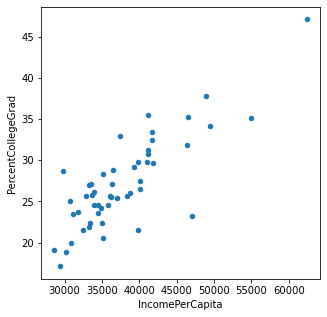

In [10]:
s.plot.scatter(x='IncomePerCapita', y='PercentCollegeGrad', figsize=(5,5))

<AxesSubplot:xlabel='IncomePerCapita', ylabel='PercentCollegeGrad'>

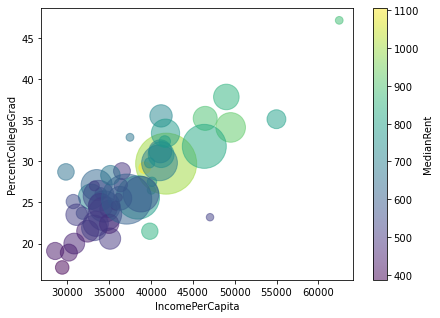

In [11]:
s.plot.scatter(
    x='IncomePerCapita', y='PercentCollegeGrad', 
    s=s.Population/10000, c='MedianRent', colormap=plt.cm.viridis, sharex=False,
    figsize=(7,5), alpha=0.5
)

### Line
* Data types: 
    * **time** or continuous quantitative column &rarr; x-axis
    * multiple **quantitative** columns &rarr; y-axis and color
* Question type:  time trend
* Description: https://datavizcatalogue.com/methods/line_graph.html
* Variations:  Area, stacked area
* Python:  https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.line.html

How does population change over time?

<AxesSubplot:>

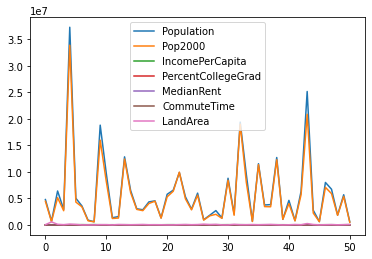

In [12]:
s.plot.line()

### Color mapping

* Color perception: https://en.wikipedia.org/wiki/Color_vision
    * hue (wavelength) percieved categorically by cones?
    * intensity percieved quantitatively as amplitude
* Mapping data values to color using colormaps:
    * categorical data &rarr; hue : Qualitative, Cyclic colormaps
    * quantitative &rarr; saturation or luminance : Sequential, Diverging +/- colormaps
* Python matplotlib colormaps: https://matplotlib.org/stable/tutorials/colors/colormaps.html
* Avoid:
    * red-green colormaps
    * rainbow colormaps for quantitative data
    

### Annotating plots

* Python matplotlib: use the Axes object returned from a plot
    * `ax = pandas.dataframe.plot.xxx()`
    * `ax.text()`, `ax.add_line()`, `ax.add_path()`, `ax.annotate()`
    * `pandas.dataframe.plot.xxx(..., ax=ax)`


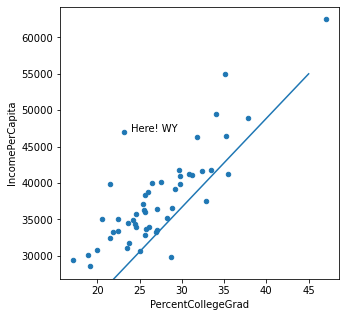

In [54]:
ax = s.plot.scatter(x='PercentCollegeGrad', y='IncomePerCapita', figsize=(5,5))
ax.text(x=24, y=47000, s="Here! WY")
x = [0, 45]
y = [0, 55000]
ax.add_line(plt.Line2D(x, y))

### Exercise 

Compare the distributions of Population and Pop2000 ?


## Thought Exercise
Say we had data about the heights of everyone in the class and their sex.  List some ways to visualize this data to get an idea of the impact of M vs F on height?

## Multi-dimensional data visualization

How to visualize more than 2 variables?

* Some  visualization methods for multi-dimensional data
* Python:  `pandas.plotting.xxx`


### Multi-variate distributions

* Histogram matrix http://square.github.io/crossfilter/
* Boxplots https://en.wikipedia.org/wiki/Box_plot
* KDEs 


In [163]:
s.head()

,Name,Abbrev,Population,Pop2000,IncomePerCapita,PercentCollegeGrad,MedianRent,CommuteTime,LandArea
0,Alabama,AL,4779736,4447100,32419,21.5,435,23.7,50645.33
1,Alaska,AK,710231,626932,40042,26.5,857,17.9,570640.95
2,Arizona,AZ,6392017,5130632,32833,25.7,709,24.9,113594.08
3,Arkansas,AR,2915918,2673400,30177,18.9,425,21.0,52035.48
4,California,CA,37253956,33871648,41805,29.7,1002,27.0,155779.22


In [166]:
norm = s.iloc[:, 2:]
norm = (norm - norm.mean()) / norm.std()
norm.head()

,Population,Pop2000,IncomePerCapita,PercentCollegeGrad,MedianRent,CommuteTime,LandArea
0,-0.186709,-0.173746,-0.811808,-1.029702,-1.207574,0.100566,-0.217568
1,-0.783062,-0.793498,0.332839,-0.119251,1.285175,-1.524979,5.862398
2,0.049558,-0.062856,-0.749643,-0.264923,0.410941,0.436886,0.518450
3,-0.459836,-0.461497,-1.148461,-1.503136,-1.266643,-0.656153,-0.201314
4,4.572127,4.599846,0.597566,0.463437,2.141688,1.025445,1.011693


array([[<AxesSubplot:title={'center':'Population'}>,
        <AxesSubplot:title={'center':'Pop2000'}>,
        <AxesSubplot:title={'center':'IncomePerCapita'}>],
       [<AxesSubplot:title={'center':'PercentCollegeGrad'}>,
        <AxesSubplot:title={'center':'MedianRent'}>,
        <AxesSubplot:title={'center':'CommuteTime'}>],
       [<AxesSubplot:title={'center':'LandArea'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

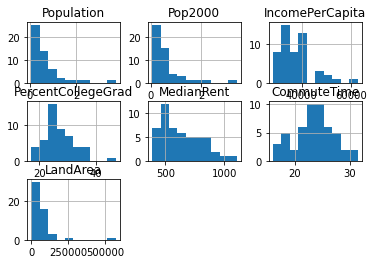

In [161]:
s.hist()

<AxesSubplot:ylabel='Density'>

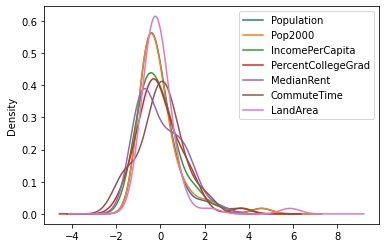

In [167]:
norm.plot.kde()

<AxesSubplot:>

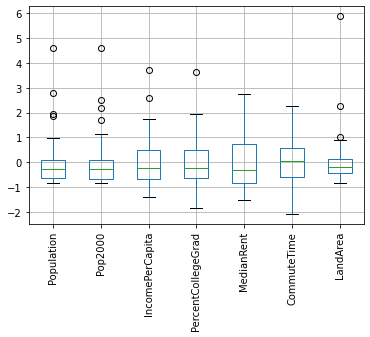

In [170]:
pandas.plotting.boxplot(norm, rot=90)

<AxesSubplot:>

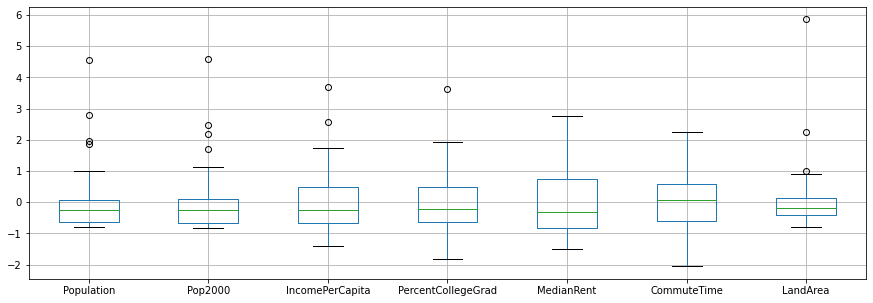

In [171]:
pandas.plotting.boxplot(norm, figsize=(15, 5))

### Scatterplot matrix

Scatter plots of all pairs of variables
https://bl.ocks.org/mbostock/4063663



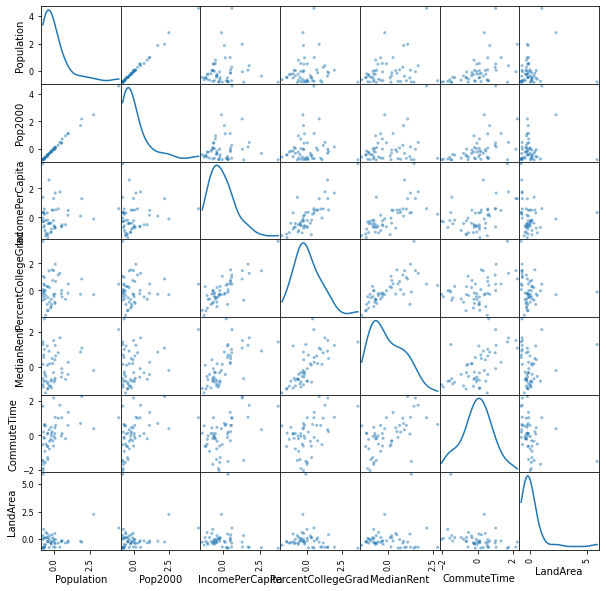

In [175]:
plot = pandas.plotting.scatter_matrix(norm, figsize=(10,10), diagonal='kde')

### Parallel Coordinates

Parallel axes with data rows as connected lines 
https://bl.ocks.org/jasondavies/1341281 

* Point-line duality, multi-d patterns, clusters, outliers, adjacent correlations
* Scalability?


In [178]:
dt = norm.join(s.Abbrev)
dt.head()

,Population,Pop2000,IncomePerCapita,PercentCollegeGrad,MedianRent,CommuteTime,LandArea,Abbrev
0,-0.186709,-0.173746,-0.811808,-1.029702,-1.207574,0.100566,-0.217568,AL
1,-0.783062,-0.793498,0.332839,-0.119251,1.285175,-1.524979,5.862398,AK
2,0.049558,-0.062856,-0.749643,-0.264923,0.410941,0.436886,0.518450,AZ
3,-0.459836,-0.461497,-1.148461,-1.503136,-1.266643,-0.656153,-0.201314,AR
4,4.572127,4.599846,0.597566,0.463437,2.141688,1.025445,1.011693,CA


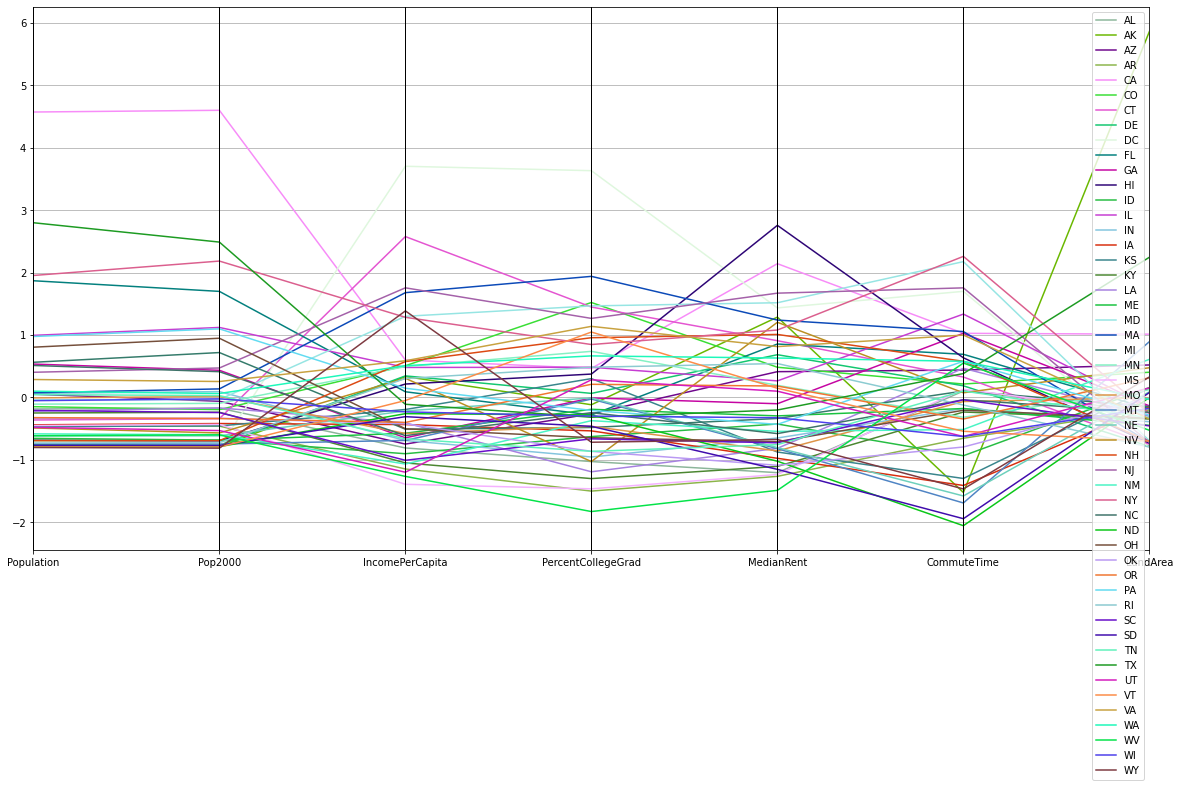

In [180]:
plot = pandas.plotting.parallel_coordinates(dt, 'Abbrev')
plot.figure.set_size_inches(20, 10)

### Heatmap

Spreadsheets with color
http://bl.ocks.org/mbostock/3202354

* Comparison to Parallel Coords?
* Scalability? Number of columns ~= number of rows

In [181]:
norm.head()

,Population,Pop2000,IncomePerCapita,PercentCollegeGrad,MedianRent,CommuteTime,LandArea
0,-0.186709,-0.173746,-0.811808,-1.029702,-1.207574,0.100566,-0.217568
1,-0.783062,-0.793498,0.332839,-0.119251,1.285175,-1.524979,5.862398
2,0.049558,-0.062856,-0.749643,-0.264923,0.410941,0.436886,0.518450
3,-0.459836,-0.461497,-1.148461,-1.503136,-1.266643,-0.656153,-0.201314
4,4.572127,4.599846,0.597566,0.463437,2.141688,1.025445,1.011693


/var/folders/p3/hk_38bw92lscjt3j9smdq82m0000gn/T/ipykernel_83498/1787043542.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot.axes.xaxis.set_ticklabels(['0']+list(norm.columns), rotation='vertical')


[Text(-1.0, 1, '0'),
 Text(0.0, 1, 'Population'),
 Text(1.0, 1, 'Pop2000'),
 Text(2.0, 1, 'IncomePerCapita'),
 Text(3.0, 1, 'PercentCollegeGrad'),
 Text(4.0, 1, 'MedianRent'),
 Text(5.0, 1, 'CommuteTime'),
 Text(6.0, 1, 'LandArea'),
 Text(7.0, 1, '')]

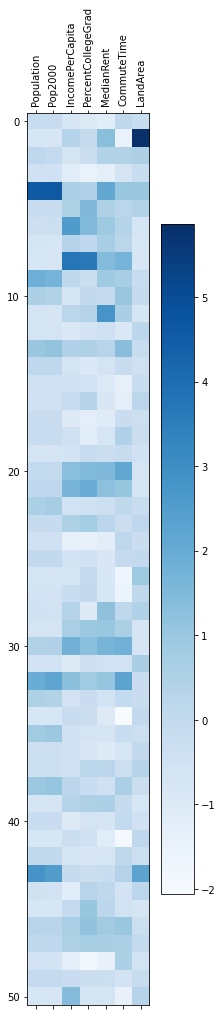

In [186]:
plot = matplotlib.pyplot.matshow(norm, cmap=matplotlib.pyplot.cm.Blues)
plot.figure.colorbar(plot)
plot.axes.xaxis.set_ticklabels(['0']+list(norm.columns), rotation='vertical')

### Interactive methods for exploring multiple variables

Dynamic queries, selecting variables:
* https://bost.ocks.org/mike/nations/ 
* https://www.gapminder.org/world/  
* https://www.youtube.com/watch?v=5X8XY9430fM 


## Exercises

Compare one to many:  How does VA fit in with other states?
  
Use parallel coordinates,
and color the VA line differently from all other lines. 

Hint: think about it as a data problem, not a coding problem.